# Edges & Contours using OpenCV 


## What is edge detection?
Edge detection is an image-processing technique, which is used to identify the boundaries of objects, or regions within an image. 
For edge detection we will be using the Canny library in open cv as it has the least amount of errors when compared to other methods.


### Canny edge detection algorithm
Canny Edge Detection is used to detect the edges in an image. It uses a multistage algorithm  and returns a gray image as the output. 


You can perform all the steps on an image using the method Canny().

 
### cv2.Canny(image, threshold1, threshold2, apertureSize, L2gradient)

The function finds edges in the input image and marks them in the output map edges using the Canny algorithm. The smallest value between threshold1 and threshold2 is used for edge linking. The largest value is used to find initial segments of strong edges.

Necessary parameters are:
1. image: Source/Input image of n-dimensional array.
2. threshold1: It is the High threshold value of intensity gradient. 
3. threshold2: It is the Low threshold value of intensity gradient.


Optional parameters are:

4. apertureSize: Order of Kernel(matrix) for the Sobel filter. Its default value is (3 x 3), and its value should be odd between 3 and 7. It is used for finding image gradients. Filter is used for smoothening and sharpening of an image.

5. L2gradient: This specifies the equation for finding gradient magnitude. L2gradient is of boolean type, and its default value is False.












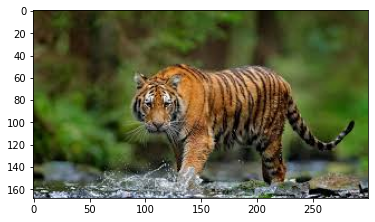

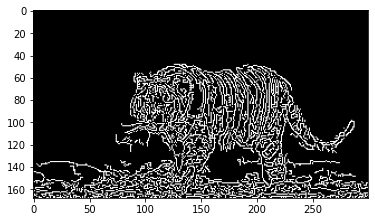

In [1]:
import cv2
import numpy as np
from  matplotlib import pyplot as plt


# capture frames from a camera
cap = cv2.imread('Images/tiger.jpeg')
im2 = cv2.cvtColor(cap,cv2.COLOR_BGR2RGB) 
# Display an original image


# finds edges in the input image image and marks them in the output map edges
edges = cv2.Canny(im2,100,200)

# Display edges in a frame



plt.imshow(im2)
plt.show()
plt.imshow(cv2.cvtColor(edges,cv2.COLOR_GRAY2BGR))
plt.show()

## What is contour detection?
It  is used for finding a closed shape and drawing the boundary of an object.   Basically it is used for determining the shape of an object. Contour detection is a useful technique for shape analysis and object detection and recognition.

Before look at the let us look at some of the functions we will be using:

### 1. cv2.threshold(source, thresholdValue, maxVal, thresholdingTechnique) 
Parameters: 
- source: Input Image array (must be in Grayscale). 
- thresholdValue: Value of Threshold below and above which pixel values will change accordingly. 
- maxVal: Maximum value that can be assigned to a pixel. 
- thresholdingTechnique: The type of thresholding to be applied. 

 If pixel value is greater than a threshold value, it is assigned one value (may be white), else it is assigned another value (may be black).

It returns a tuple of 2 values in which 1st value is given threshold value and 2nd value is modified image array.


### 2. cv2.findContours(src, contour_retrieval, contours_approximation)
 It helps in extracting the contours from the image. 
Parameters:
- src image
- contour_retrieval: This is contour retrieval mode. 
  
  Possible values are :
  a) cv2.RETR_TREE
  b) cv2.RETR_EXTERNAL
  c) cv2.RETR_LIST
  d) cv2.RETR_CCOMP etc.
- contours_approximation: This is Contour approximation method.
  
  Possible values are :
  a) cv2.CHAIN_APPROX_NONE
  b) cv2.CHAIN_APPROX_SIMPLE

It returns three values :
a) Input image array
b) Contours
c) Hierarchy


If we pass cv2.CHAIN_APPROX_NONE, all the boundary points are captured. For two endpoints of a line you can pass cv2.CHAIN_APPROX_SIMPLE. It excludes all excessive points and saves memory.


### 3. cv.DrawContours(srcimg, contours, contourIdx, colour, thickness)
It is used for drawing contours on the image


Parameters:
- srcimage 
- contours – All the input contours.
- contourIdx – Parameter indicating a contour to draw. If it is negative, all the contours are drawn.
- color – Color of the contours
- thickness is how thick are the lines drawing the contour





Number of contours8
[[[0 0]]

 [[0 1]]

 [[0 2]]

 ...

 [[3 0]]

 [[2 0]]

 [[1 0]]]


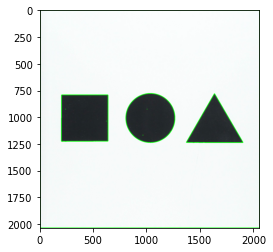

In [2]:
import numpy as np
import cv2
from  matplotlib import pyplot as plt

img = cv2.imread('Images/shapes.jpeg')
imggray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

ret ,thresh_img = cv2.threshold(imggray ,127,255,0)
contours,hierarchy = cv2.findContours(thresh_img,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
# Contours is a python list of all contours in the image and each contour is a numpy array which has (x,y) points of boundary points of an object
#Hierarchy is the parent-child relationship in contours. It is represented as an array of four values : [Next contour, previous contour, First child contour, Parent contour]

print("Number of contours"+ str(len(contours)))
print(contours[0])

cv2.drawContours(img,contours,-1,(0,255,0),5)
plt.imshow(img)
plt.show()